## Student Name: **Devarsh Sandip Shah** 
# Student ID: **8917026**
### Practical Lab-5
---

In [25]:
# Importing the necessary libraries
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt


# Loading the datasets

In [22]:
#Here X is independent variable dataframe and y is target variable Series.
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)
X.head() 

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,59.0,2.0,32.1,101.0,157.0,93.2,38.0,4.0,4.8598,87.0
1,48.0,1.0,21.6,87.0,183.0,103.2,70.0,3.0,3.8918,69.0
2,72.0,2.0,30.5,93.0,156.0,93.6,41.0,4.0,4.6728,85.0
3,24.0,1.0,25.3,84.0,198.0,131.4,40.0,5.0,4.8903,89.0
4,50.0,1.0,23.0,101.0,192.0,125.4,52.0,4.0,4.2905,80.0


In [23]:
print(y.head())
print(X.shape) #Total 442 rows and 10 independent variables are there.

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64
(442, 10)


## 1. Get the data, and run a train-validation-test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

In [26]:
mae_scores = []
mape_scores = []
r_squared_scores = []

for degree in range(0,9):
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    
    mae = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(mean_absolute_error))
    r_squared = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    mape = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(mean_absolute_percentage_error))
    
    mae_scores.append(np.mean(mae))
    r_squared_scores.append(np.mean(r_squared))
    mape_scores.append(np.mean(mape))

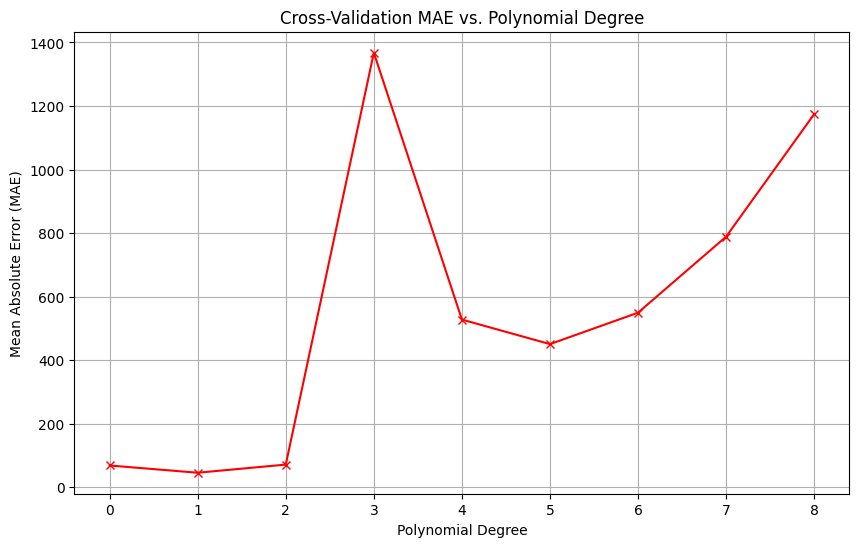

Polynomial Degree which has lowest MAE is : 1


In [29]:
degrees = list(range(0,9)) 

plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_scores, marker='x', linestyle='-', color='r')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Cross-Validation MAE vs. Polynomial Degree')
plt.grid(True)
plt.show()



best_degree = degrees[np.argmin(mae_scores)]
print(f"Polynomial Degree which has lowest MAE is : {best_degree}")

In [27]:
!pip install tabulate

# 2. Construct a table summarizing the cross-validation results. 

In [39]:
from tabulate import tabulate

data=[]

mean_std_r_squared = [f'{np.mean(r_squared_scores):.2f} ± {np.std(r_squared_scores):.2f}']
mean_std_mae = [f'{np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}']
mean_std_mape = f'{np.mean(mape_scores):.2f} ± {np.std(mape_scores):.2f}'

for degree, r_squared, mae, mape in zip(degrees, r_squared_scores, mae_scores, mape_scores):
    data.append([degree,r_squared,mae,mape])

data.append(["Mean ± Std", mean_std_r_squared[0], mean_std_mae[0], mean_std_mape[0]])

print(tabulate(data, headers=["Polynomial Degree", "R-squared (R²)", "MAE", "MAPE"], tablefmt="grid", showindex="always"))




+----+---------------------+----------------------+--------------------+----------+
|    | Polynomial Degree   | R-squared (R²)       | MAE                |     MAPE |
+====+=====================+======================+====================+==========+
|  0 | 0                   | -0.03119889941245373 | 67.8159520741218   | 0.641772 |
+----+---------------------+----------------------+--------------------+----------+
|  1 | 1                   | 0.4778410043781601   | 45.05585646391783  | 0.405348 |
+----+---------------------+----------------------+--------------------+----------+
|  2 | 2                   | -0.5176064641497732  | 70.6415274655747   | 0.579094 |
+----+---------------------+----------------------+--------------------+----------+
|  3 | 3                   | -4525.6982758136255  | 1367.786709001828  | 9.5036   |
+----+---------------------+----------------------+--------------------+----------+
|  4 | 4                   | -327.0637054740647   | 527.3328176303596  | 4.3

# 3. Identification of the Best Model: 

=> Looking at the table One can see that the one with Polynomial degree 1 has the lowest MAE and highest R-squared values: So it indicates lowest error and best fit than other degree models. 

# 4. Additional analysis and interpretation of the models' performances. 

- The choice of polynomial degree is crucial. A degree of 1 (linear regression) seems to be the best fit for this dataset, as it provides the highest R-squared and lowest MAE. 
- **Higher-degree polynomials result in overfitting, as indicated by the significantly negative R-squared values for degrees 2 to 8.**
- Higher-degree polynomial models are more complex, but that doesn't necessarily lead to better performance. In fact, in this case, it leads to significantly worse performance, as indicated by the negative R-squared values.
- I might also want to consider MAPE. It measures the percentage error in predictions. For the polynomial degree 1 model, the MAPE is relatively low, indicating that it is a good choice for making predictions.